### Проект: Исследовательский анализ данных

In [71]:
import pandas as pd


In [72]:
data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/real_estate_data.csv', sep='\t')

In [73]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Теория по гистограммам


Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. Её построение подобно работе знакомого вам метода value_counts(), подсчитывающего количество уникальных значений в списке. value_counts() группирует строго одинаковые величины и хорош для подсчёта частоты в списках с категориальными переменными. 

Параметр bins (пер. «корзины, вёдра») определяет, на сколько областей делить диапазон данных. По умолчанию таких «корзин» 10.

Границы интересующего интервала указывают в параметре range (пер. «диапазон»): range=(min_value, max_value)

    Пример на подбрасывание монетки 1000 раз: какое количество орлов выпадает подряд чаще всего?
спойлер:    Чаще всего выпадает 5 орлов и совсем редко — 10 и 0. 

[[<AxesSubplot: title={'center': '0'}>]]


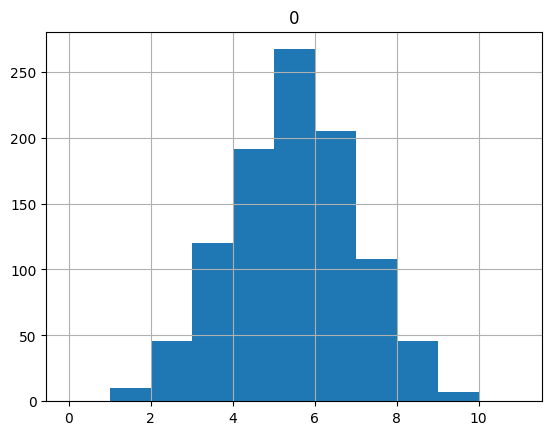

In [75]:
import random
import pandas as pd

# Функция, имитирующая один бросок монеты.
# От англ. coin - монета, flip - бросок монеты.
def coin_flip():
    # возможны два варианта:
    # - выпала решка, это +0 орлов
    # - выпал орёл, это +1 орёл
    score = random.randint(0, 1)
    return score


# Функция для суммирования числа орлов в нескольких бросках.
# Орёл и решка переводятся на английский как heads и tails.
# Аргумент repeat говорит, сколько раз бросать монету
# (от англ. repeat - повторение).
def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total


# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []

for i in range(1000):
    score = flips_heads(10)

    # Напомним: функция append() добавляет новый
    # элемент score в конец списка experiments.
    experiments.append(score)

# превращаем список в DataFrame
df_experiments = pd.DataFrame(experiments)


# постройте гистограмму для df_experiments
print(df_experiments.hist(bins=11, range=(0,11)))

Пример для бросков двух кубиков - какое суммарное число выпадает чаще всего?

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

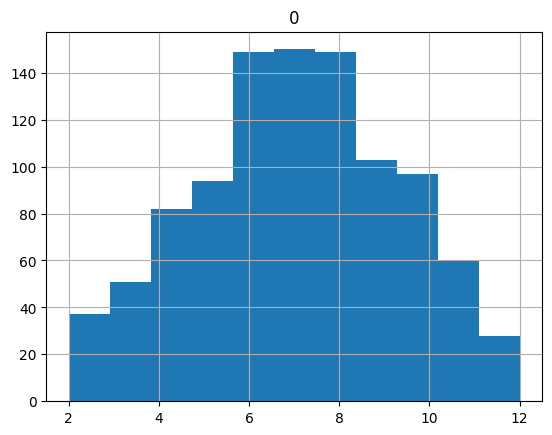

In [76]:
import pandas as pd
import random

def dice_roll():
    score = random.randint(1, 6)  
    return score

def double_roll_score():
    first = dice_roll()
    second = dice_roll()
    score = first + second
    return score

# Cоздаём пустой список. В него 
# попадут результаты экспериментов.
experiments = []
for i in range(1000):
    score = double_roll_score()
    # Напомним: метод append() добавляет новый
    # элемент score в конец списка experiments.
    experiments.append(score)

df_experiments = pd.DataFrame(experiments)
df_experiments.hist(bins=11, range=(2, 12))


##### Квартили распределения

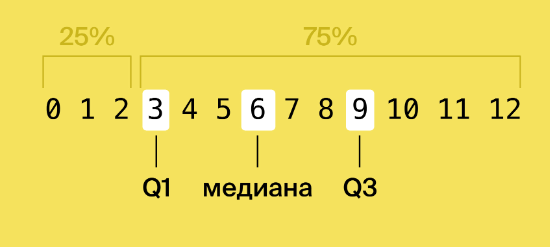

##### box-plot
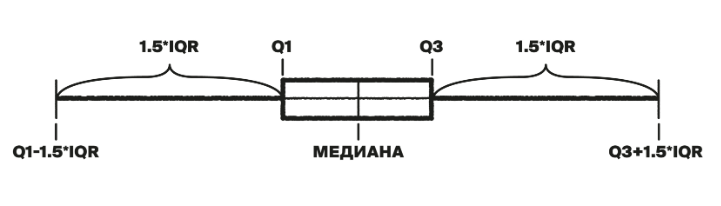

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). 

        В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».

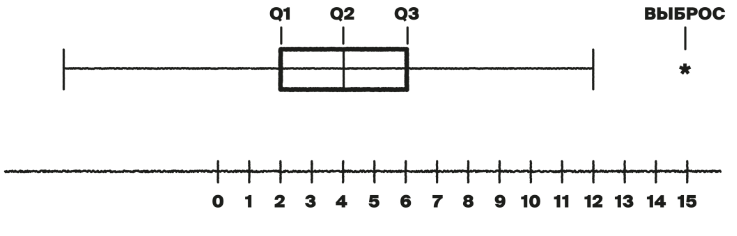

In [77]:
""" 
import matplotlib.pyplot as plt


#Отображение диаграммы ящик с усами
data.boxplot(column='column')
plt.show()

# Изменение осей графика
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#Числовое описание данных для колонки
data['column'].describe()

#Отображение гистограммы с n_bins, min_value, max_value
data['column'].hist(bins=n_bins, range=(min_value, max_value))
plt.show()

"""

" \nimport matplotlib.pyplot as plt\n\n\n#Отображение диаграммы ящик с усами\ndata.boxplot(column='column')\nplt.show()\n\n# Изменение осей графика\nplt.xlim(x_min, x_max)\nplt.ylim(y_min, y_max)\n\n#Числовое описание данных для колонки\ndata['column'].describe()\n\n#Отображение гистограммы с n_bins, min_value, max_value\ndata['column'].hist(bins=n_bins, range=(min_value, max_value))\nplt.show()\n\n"

    Гистограмма
это график, который показывает, как часто в наборе
данных встречается то или иное значение

    Распределение
это все возможные значения переменной с частотой
их появления

    Нормальное распределение
чаще всего встречается среднее значение и близкие к
нему, а крайние значения встречаются довольно редко

    Распределение Пуассона
число событий в единицу времени, если они в среднем
происходят с измеренной частотой

    Характерный разброс
то, какие значения оказались вдали от среднего, и насколько их много

    Числовое описание данных
среднее, медиана, стандартное отклонение, количество наблюдений в выборке и разброс их значений

    Квартиль
число, разбивающее выборку на две части: значения в
одной части меньше квартиля, а в другой - больше
    
    Первый квартиль Q1
25% элементов меньше, а 75% – больше него
    
    Второй квартиль Q2 (медиана)
половина элементов больше и половина меньше неё

    Третий квартиль Q3
75% элементов меньше и 25% элементов больше него

    Межквартильный размах
это расстояние между первым Q1 и третьим Q3 квартилями
    
    Стандартное отклонение
числовая характеристика данных, которая показывает,
насколько значения в выборке отличаются от среднего
арифметического

### отступление по срезам данных

In [78]:
import pandas as pd

df = pd.DataFrame(
    {
        'From': [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21032, 19250, 19301, 20168, 31425],
        'Date_From': [
            '01.07.19',
            '01.07.19',
            '04.07.2019',
            '03.07.2019',
            '05.07.2019',
        ],
        'Date_To': [
            '07.07.19',
            '07.07.19',
            '10.07.2019',
            '09.07.2019',
            '11.07.2019',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    })

df

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [79]:
df[df.Price< df.Price.max()/1.5]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   From              5 non-null      object
 1   To                5 non-null      object
 2   Is_Direct         5 non-null      bool  
 3   Has_luggage       5 non-null      bool  
 4   Price             5 non-null      int64 
 5   Date_From         5 non-null      object
 6   Date_To           5 non-null      object
 7   Airline           5 non-null      object
 8   Travel_time_from  5 non-null      int64 
 9   Travel_time_to    5 non-null      int64 
dtypes: bool(2), int64(3), object(5)
memory usage: 458.0+ bytes


In [81]:
from datetime import datetime

In [82]:
df[~(df.Is_Direct) | (df.Date_To <= '08.07.2019')]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355


In [83]:
pd.to_datetime(df.Date_To)<= datetime(2019, 7,8)

0     True
1     True
2    False
3    False
4    False
Name: Date_To, dtype: bool

In [84]:
df[~(df.Is_Direct) | (pd.to_datetime(df.Date_To)<= datetime(2019, 7,8))]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355


In [85]:
#query с несколькими условиями
df.query('Has_luggage == False and (Airline !="S7" and Airline !="Rossiya")')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720


In [86]:
"""
# прибавить какую-то дельту к datetime через pandas.Timedelta
datafr['local_time'] = datafr['date_time'] + pd.Timedelta(hours=3)

# округлить значение до 1 часа в pandas 
datafr['date_hour'] = datafr.local_time.dt.round('1H')

"""

"\n# прибавить какую-то дельту к datetime через pandas.Timedelta\ndatafr['local_time'] = datafr['date_time'] + pd.Timedelta(hours=3)\n\n# округлить значение до 1 часа в pandas \ndatafr['date_hour'] = datafr.local_time.dt.round('1H')\n\n"

### отступление по графикам

   a   b
0  2   4
1  3   9
2  4  16
3  5  25


<AxesSubplot: >

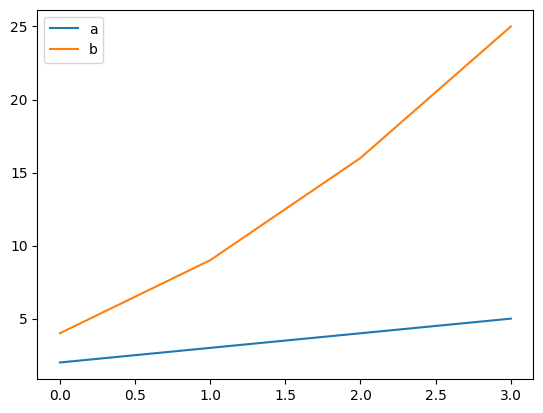

In [87]:
# Метод plot() построил графики по значениям столбцов из датафрейма. На оси абсцисс (x) расположились индексы, 
# а на оси ординат (y) — значения столбцов. 


df = pd.DataFrame({'a': [2, 3, 4, 5], 'b': [4, 9, 16, 25]})
print(df)
df.plot()

<AxesSubplot: title={'center': 'A и B'}>

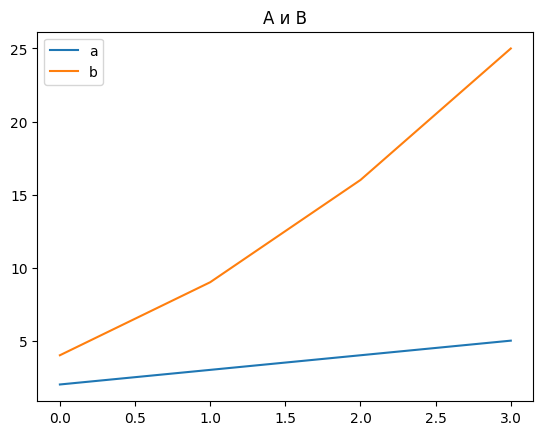

In [88]:
# наименование графика
df.plot(title='A и B') 

<AxesSubplot: >

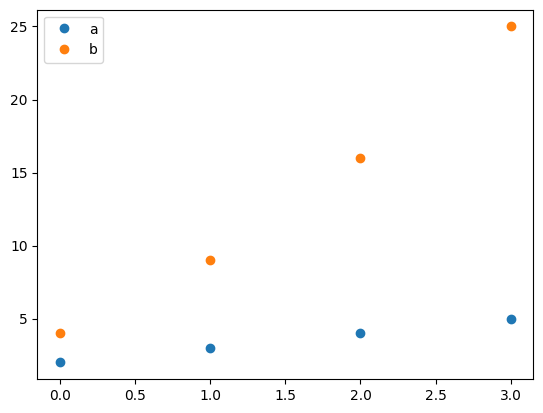

In [89]:
# поставить график точками

df.plot(style='o') # 'o' похожа на кружок или точку, запомнить легко

<AxesSubplot: >

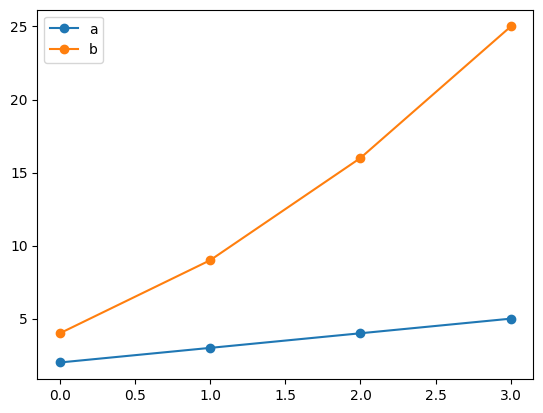

In [90]:
# прорисовать график и точками и линиями

df.plot(style='o-') # 'o-' - кружок и линия 


<AxesSubplot: xlabel='b'>

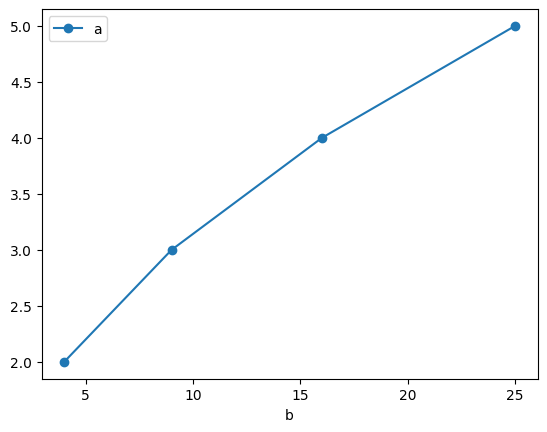

In [91]:
# построить график зависимости одного столбца от другого

df.plot(x='b', y='a', style='o-')

точки упираются в края графика. Скорректируем границы параметрами xlim и ylim — с ними вы познакомились, когда изучали ящик с усами. Напомним, что параметрам xlim и ylim в скобках передают минимальное и максимальное значение. Ограничим ось абсцисс значениями от 0 до 30:

<AxesSubplot: xlabel='b'>

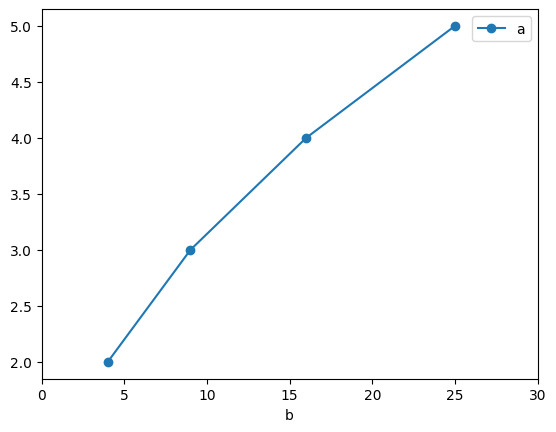

In [92]:
df.plot(x='b', y='a', style='o-', xlim=(0, 30))

<AxesSubplot: xlabel='b'>

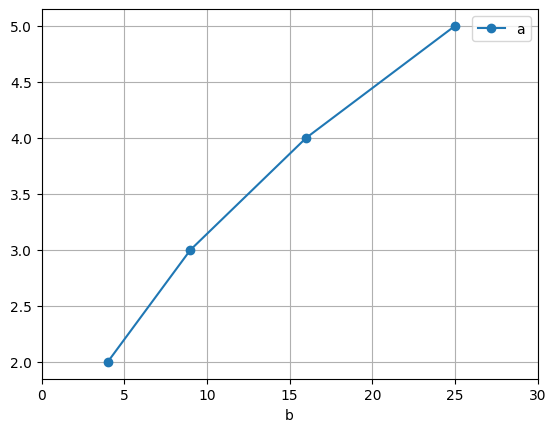

In [93]:
# добавим сетку для графика
df.plot(x='b', y='a', style='o-', xlim=(0, 30), grid=True)

<AxesSubplot: xlabel='b'>

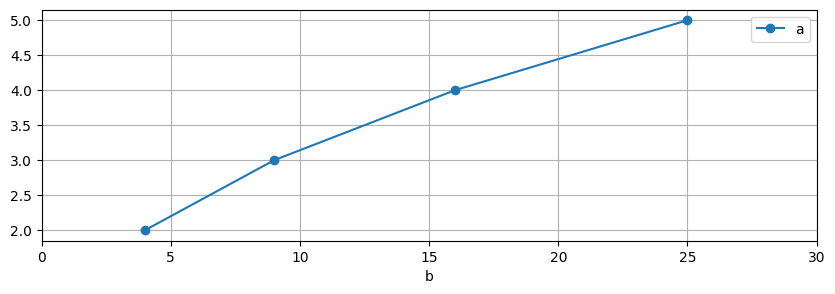

In [94]:
# регулируем размер

# строим большой график
df.plot(x='b', y='a', style='o-', xlim=(0, 30), grid=True, figsize=(10, 3)) # размер в дюймах

### отступление на теорию


In [95]:
import pandas as pd

data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/visits.csv', sep='\t')
data['local_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
) + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')

data

,date_time,id,time_spent,name,local_time,date_hour
0,20180406T165358,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,20180404T173913,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,20180403T172824,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,20180407T070441,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,20180404T132049,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00
...,...,...,...,...,...,...
317099,20180408T053133,9cdb5039,11.0,Гейхера,2018-04-08 08:31:33,2018-04-08 09:00:00
317100,20180403T021353,9cdb5039,181.0,Гейхера,2018-04-03 05:13:53,2018-04-03 05:00:00
317101,20180408T062636,9cdb5039,252.0,Гейхера,2018-04-08 09:26:36,2018-04-08 09:00:00
317102,20180405T232425,9cdb5039,29.0,Гейхера,2018-04-06 02:24:25,2018-04-06 02:00:00


<AxesSubplot: xlabel='local_time'>

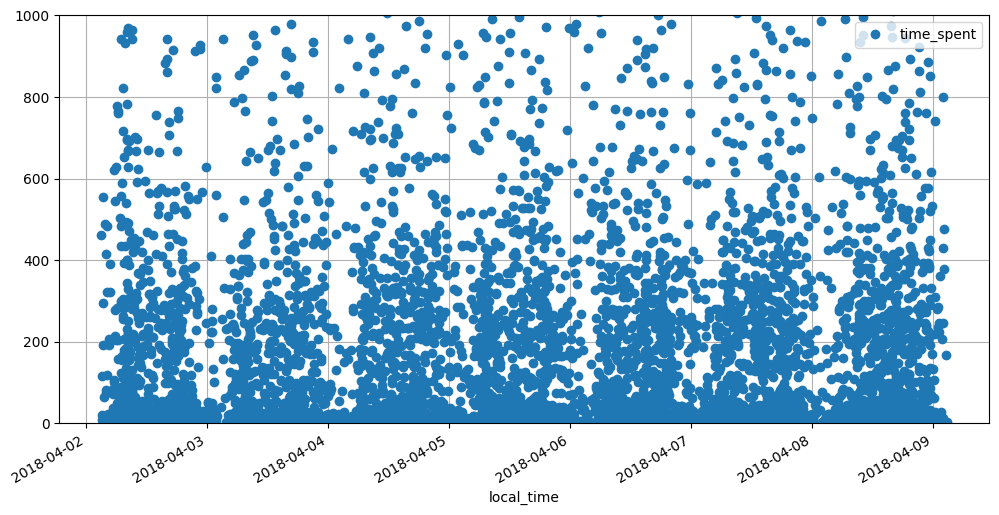

In [96]:
# строим график зависимости времени, проведенного на заправке, от конкретного времени (даты)
# причем только для конкретной заправки (с опр id)

sample = data.query('id == "3c1e4c52"')
sample.plot(
    x='local_time',
    y='time_spent',
    ylim=(0, 1000),
    style='o',
    grid=True,
    figsize=(12, 6),
) 

<AxesSubplot: xlabel='local_time'>

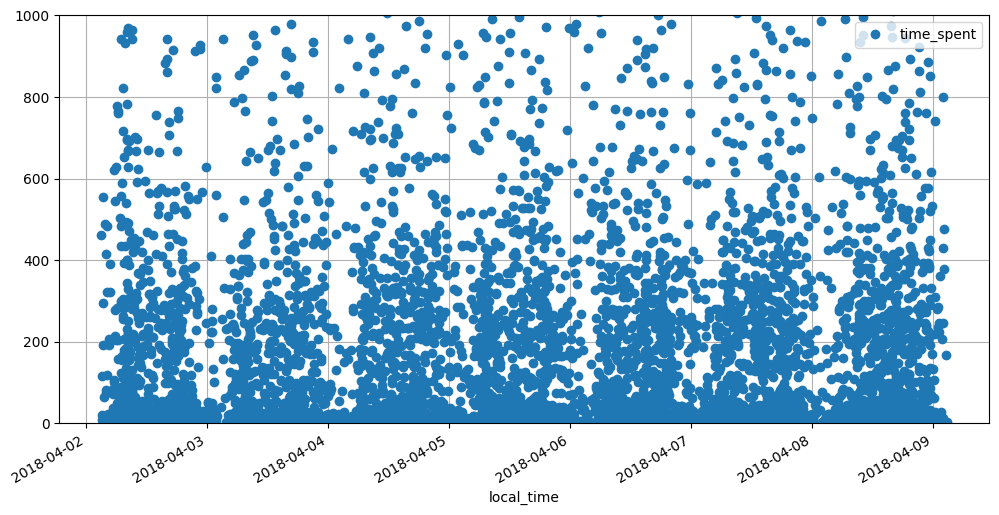

In [97]:
# упростим запись

data\
    .query('id == "3c1e4c52"')\
    .plot(x='local_time', y='time_spent', 
          ylim=(0, 1000), style='o', grid=True, figsize=(12, 6))

Вернёмся к данным по АЗС. На графике слишком много точек. Чтобы сделать его нагляднее, будем отмечать не визит, а среднюю продолжительность заправки в час. Вы уже создавали столбец date_hour с округлённым временем заезда на АЗС. 

Обратимся к pivot_table(). Добавим сводную таблицу в цепочку между query() и plot():

<AxesSubplot: xlabel='date_hour'>

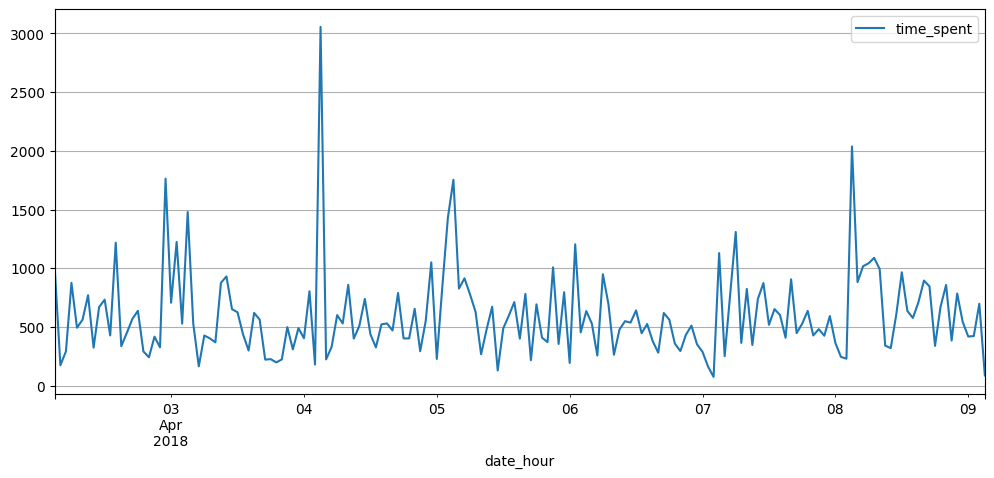

In [98]:
data['date_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
)
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
(
    data.query('id == "3c1e4c52"')
    .pivot_table(index='date_hour', values='time_spent')
    .plot(grid=True, figsize=(12, 5))
)

In [99]:
# что произошло? с помощью pivot мы отправили даты в индексы , а значения time_spent уложили в столбец
# после чего дали команду plot, который по умолчанию построил зависимость значений в единственном столбце от индексов
data.query('id == "3c1e4c52"')\
    .pivot_table(index='date_hour', values='time_spent')

,time_spent
date_hour,
2018-04-02 03:00:00,983.333333
2018-04-02 04:00:00,173.538462
2018-04-02 05:00:00,291.071429
2018-04-02 06:00:00,875.320000
2018-04-02 07:00:00,493.089286
...,...
2018-04-08 23:00:00,542.425000
2018-04-09 00:00:00,418.086957
2018-04-09 01:00:00,422.083333


Итого, На графике показана средняя продолжительность заправки на АЗС под номером 3c1e4c52 за каждый час. Обратим внимание, что в среднем водители проводят на АЗС около 500 секунд. 

Помня о пике гистограммы в 200 секунд, нельзя не удивиться такому значению.  

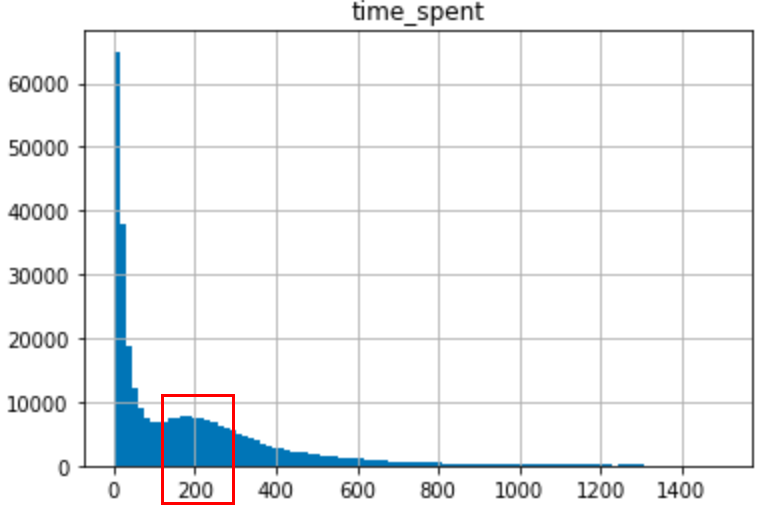

Есть и таинственный пик, когда среднее время заправки достигло 3000 секунд (почти час). Многовато. В прошлых уроках заезды дольше 1000 секунд вообще отбрасывались, ведь они не слишком похожи на правду. Добавим соответствующее условие в query():

<AxesSubplot: xlabel='date_hour'>

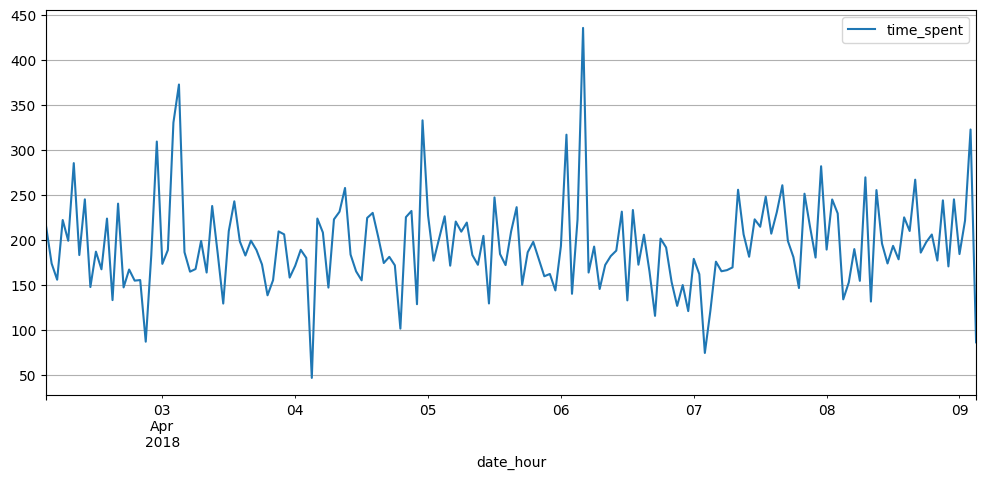

In [100]:
(
    data.query('id == "3c1e4c52" and time_spent < 1000')
    .pivot_table(index='date_hour', values='time_spent')
    .plot(grid=True, figsize=(12, 5))
)

Средняя продолжительность заправки снизилась вполовину! Вывод: это выбросы повлияли на среднее. 

Вычислим устойчивую к выбросам медиану. В pivot_table() значением параметра aggfunc передадим median. 

Зачем? Напомним, что в aggfunc передают функцию, которую применяют к значениям сводной таблицы. Например, метод count посчитает число значений в группе. Если в aggfunc не указать ничего, отработает расчёт среднего: **mean**.

<AxesSubplot: xlabel='date_hour'>

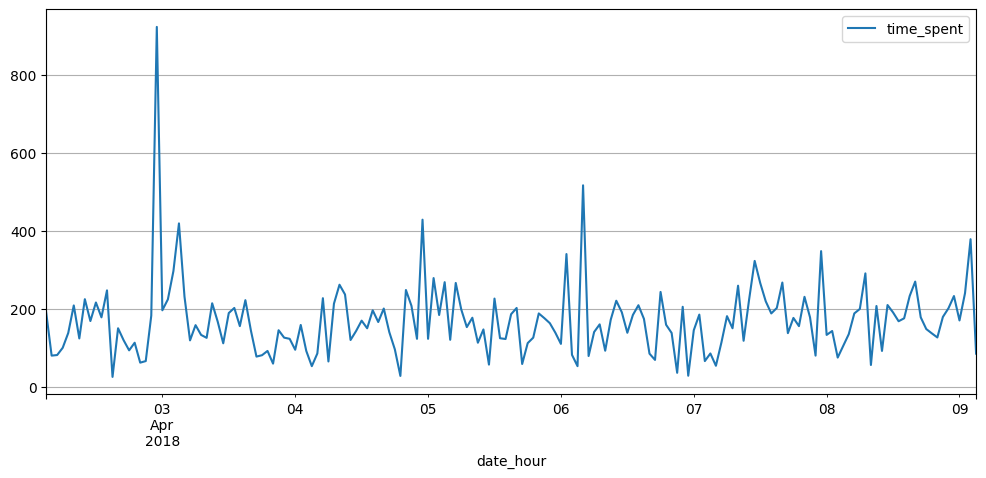

In [101]:
(
    data.query('id == "3c1e4c52"')
    .pivot_table(index='date_hour', values='time_spent', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

даже без фильтра time_spent < 1000 медиана дала среднюю продолжительность заправки примерно в 200 секунд. Медиана устойчива к выбросам, но всё же не безупречна: пик более 800 секунд в ночь со 2 на 3 апреля выглядит аномальным значением.

В целом нет никакой явной связи между продолжительностью заезда и временем дня. Это странно. На этой АЗС не бывает очередей? Или что-то не так с данными? Число заездов в течение дня точно должно меняться. 

Проверим это.

<AxesSubplot: xlabel='date_hour'>

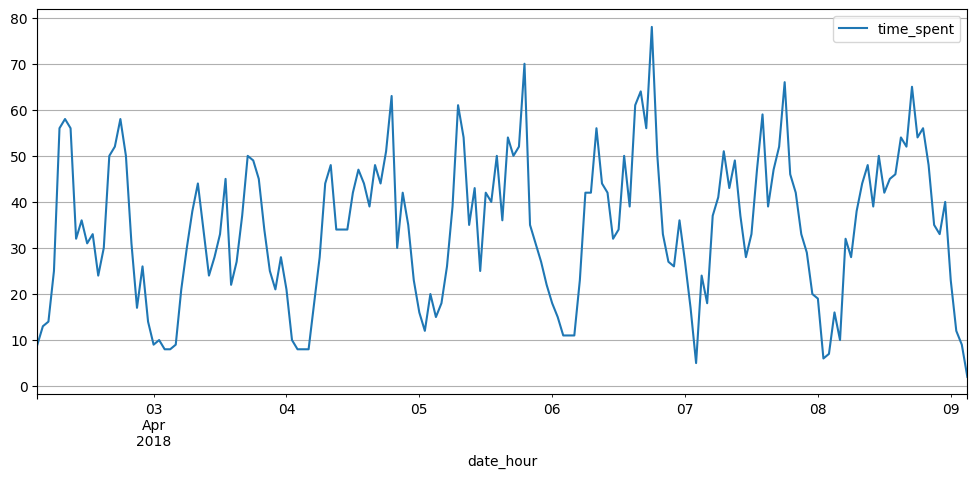

In [102]:
# строим график зависимости между временем прибытия и количеством заездов

data.query('id=="3c1e4c52"').\
    pivot_table(index='date_hour', values='time_spent', aggfunc= 'count')\
        .plot(grid=True, figsize=(12, 5))

Ночью заездов на АЗС меньше, чем днем

грубо говоря, с ночи до утра мало, потом очень много, к полудню мало, к вечеру опять много, и потом снова падает до низких значений

In [103]:
data.query('id=="3c1e4c52"').\
    pivot_table(index='date_hour', values='time_spent', aggfunc= 'count')\
            .head(23)

,time_spent
date_hour,
2018-04-02 03:00:00,9
2018-04-02 04:00:00,13
2018-04-02 05:00:00,14
2018-04-02 06:00:00,25
2018-04-02 07:00:00,56
2018-04-02 08:00:00,58
2018-04-02 09:00:00,56
2018-04-02 10:00:00,32
2018-04-02 11:00:00,36


Посчитаем долю всех слишком быстрых заправок относительно всех заездов



In [104]:
data['too_fast'] = data['time_spent'] < 60

print(data.too_fast.mean()) # 42 процента 

0.42213910893586964


In [105]:
# собираем данные в сводную таблицу: сгруппировав доли быстрых заездов по АЗС.

too_fast_stat = data.pivot_table(index= 'id', values= 'too_fast') # aggfunc по умолчанию mean 
too_fast_stat

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269
...,...
fbbd8cc2,0.239669
fc4b1b72,0.191136
fc661c22,0.912344


array([[<AxesSubplot: title={'center': 'too_fast'}>]], dtype=object)

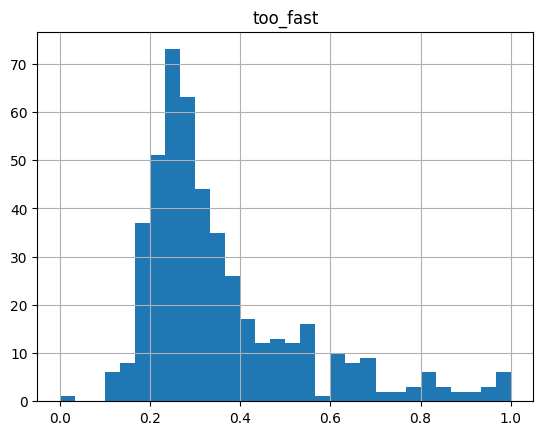

In [106]:
# нужно визуализировать распределение быстрых заездов сразу по всем АЗС. Строим гистограмму
too_fast_stat.hist(bins=30)

Пик графика около 0.3. Значит, у большинства АЗС около 30% заездов аномально быстрые. Однако бывают и АЗС, где 100% заездов аномально быстрые! 

фиксируем проблему

array([[<AxesSubplot: title={'center': 'too_slow'}>]], dtype=object)

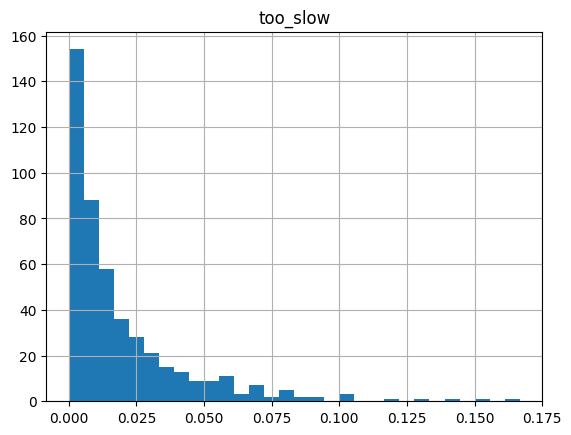

In [107]:
# аналогично найдем долю слишком долгих заправок

data['too_slow'] = data['time_spent'] > 1000
too_slow_stat = data.pivot_table(index='id', values='too_slow')

# нужно визуализировать распределение быстрых заездов сразу по всем АЗС. Строим гистограмму
too_slow_stat.hist(bins=30)

Слишком долгих заправок гораздо меньше, чем слишком коротких. На большинстве станций длительных заездов меньше 5%. Простимся с ними без печали.

### дополнительный бонус - срезы через обращения к другим объектам: словарям, сериям, индексам, датафреймам

In [108]:
# срез через обращение к словарю
our_dict = {0: 10, 1: 11, 2: 12} 
df = pd.DataFrame({
    'a': [0, 1, 10, 11, 12], 
    'b': [5, 4, 3, 2, 1],
    'c': ['X', 'Y', 'Y', 'Y', 'Z']
})

print(df.query('a in @our_dict')) # строим срез, в котором значения столбца a равны ключам словаря

   a  b  c
0  0  5  X
1  1  4  Y


In [109]:
# срез через обращение к серии

our_series=pd.Series([10,11,12])
df = pd.DataFrame({
    'a': [0, 1, 10, 11, 12],
    'b': [5, 4, 3, 2, 1],
    'c': ['X', 'Y', 'Y', 'Y', 'Z']
})
print(df.query('a in @our_series')) # строим срез, в котором значения столбца a равны значениям Series, но не их индексам

    a  b  c
2  10  3  Y
3  11  2  Y
4  12  1  Z


In [110]:
# срез через обращение к индексам серии

our_series = pd.Series([10,11,12])
df = pd.DataFrame({
    'a': [0, 1, 10, 11, 12],
    'b': [5, 4, 3, 2, 1],
    'c': ['X', 'Y', 'Y', 'Y', 'Z']
})
print(df.query('a in @our_series.index')) # строим срез, в котором значения столбца a равны индексам Series, т. е. 0, 1 или 2

   a  b  c
0  0  5  X
1  1  4  Y


In [111]:
# срез через обращение к столбцу другого датафрейма

df = pd.DataFrame({
    'a': [0, 1, 10, 11, 12],
    'b': [5, 4, 3, 2, 1],
    'c': ['X', 'Y', 'Y', 'Y', 'Z']
})
our_df = pd.DataFrame ({
    'a1': [2, 4, 6],
    'b1': [3, 2, 2],
    'c1': ['A', 'B', 'C']
})
print(df.query('b in @our_df.b1')) # строим срез, в котором значения столбца b равны значениям столбца b1 датафрейма our_df

    a  b  c
2  10  3  Y
3  11  2  Y


### продолжаем с заправками

1) Сделать срез из too_fast_stat, где останутся только «хорошие» АЗС (те, на которых доля сверхкоротких заправок меньше 50%).

2) Получить срез из data с id «хороших» АЗС.

In [112]:
too_fast_stat.head()

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269


In [113]:
data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True,False
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True,False


*Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. Если бы вы писали отчёт, это предложение непременно вошло бы в него.*

In [114]:
# отберем строки из too_fast, в которых среднее значение числа слишком быстрых заправок менее 50%
good_ids = too_fast_stat.query('too_fast<0.5')
good_ids.head()


,too_fast
id,
00ca1b70,0.250000
0178ce70,0.211538
01abf4e9,0.268293
030a9067,0.330435
03740f2d,0.261261


In [115]:
good_data = data.query('id in @good_ids.index')
good_data

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True,False
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True,False
...,...,...,...,...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера,2018-04-08 08:31:33,2018-04-08 09:00:00,True,False
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,2018-04-03 05:13:53,2018-04-03 05:00:00,False,False
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера,2018-04-08 09:26:36,2018-04-08 09:00:00,False,False
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера,2018-04-06 02:24:25,2018-04-06 02:00:00,True,False


In [116]:
print(data.shape[0])
print(good_data.shape[0])
print(f'Процент оставшихся данных в good_data соствляет {round(good_data.shape[0]/ data.shape[0] * 100, 0)}%')

317104
229095
Процент оставшихся данных в good_data соствляет 72.0%


После применения правила осталось 72% (229095/317104) от первоначальных данных. Хоть 28% потерялось, качество оставшихся данных улучшилось. А значит, показатели будут более достоверными.

    Проблема: 
в выборке есть аномально быстрые и аномально медленные заезды. Скорее всего, их совершали не те, кто приезжал просто заправиться.

    Что нужно сделать: 
исключить эти заезды из анализа, чтобы получить более точные показатели. Аномальные значения могут влиять на средние значения и медианы. 

    Правило: 
заезды, длительность которых короче 60 секунд и длиннее 1000 секунд, исключаются из анализа — это предложение тоже вошло бы в отчёт.

In [117]:
good_data = good_data.query('60<=time_spent <=1000')
good_data

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False
...,...,...,...,...,...,...,...,...
317096,2018-04-05 07:08:49,9cdb5039,157.0,Гейхера,2018-04-05 10:08:49,2018-04-05 10:00:00,False,False
317097,2018-04-03 09:52:56,9cdb5039,179.0,Гейхера,2018-04-03 12:52:56,2018-04-03 13:00:00,False,False
317098,2018-04-03 13:39:14,9cdb5039,198.0,Гейхера,2018-04-03 16:39:14,2018-04-03 17:00:00,False,False
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,2018-04-03 05:13:53,2018-04-03 05:00:00,False,False


array([[<AxesSubplot: title={'center': 'time_spent'}>]], dtype=object)

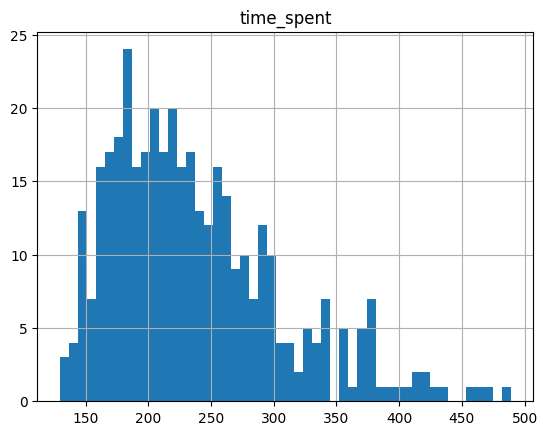

In [118]:
# построим гистограмму медианной величины времени заправок по всем АЗС
good_data.pivot_table(index= 'id', values='time_spent', aggfunc='median')\
    .hist(bins=50)

Для большинства АЗС медианная длительность заезда находится в диапазоне между 150 секундами (две с половиной минуты) и 300 секундами (пять минут). 

Конечная цель  анализа — определить сети заправок, где водители задерживаются надолго. Посчитаем медианную продолжительность заезда для каждой сети и выведем на экран список в порядке возрастания.

In [119]:
good_data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False


In [120]:
good_data.pivot_table(index= 'name', values='time_spent', aggfunc='median')\
    .sort_values(by='time_spent')

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


Сравним две гистограммы: для сырых данных и для отфильтрованных данных


<AxesSubplot: ylabel='Frequency'>

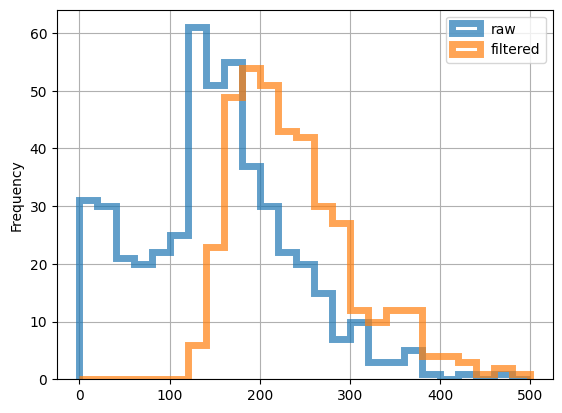

In [121]:
# нанесем две гистограммы на один график

median_station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)

ax = median_station_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)
good_stations_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
)

In [122]:
# сделать часть текста другим цветом markdown
# цвет markdown
# <font color='red'>histtype</font>

Параметры для plot hist: 

-  <font color='red'>histtype</font> (от англ. the type of histogram — «тип гистограммы»). В параметре указывают тип гистограммы, по умолчанию — это столбчатая (закрашенная). Значение step (пер. «шаг») чертит только линию.

-  <font color='red'>linewidth</font>(от англ. width of line — «толщина линии»). Задаёт толщину линии графика в пикселях.

- <font color='red'>alpha</font> (от термина «альфа-канал»). Назначает густоту закраски линии. 1 — это 100%-я закраска; 0 — прозрачная линия. С параметром 0.7 линии чуть прозрачны, так виднее их пересечения.

-  <font color='red'>label</font>(пер. «ярлык», «этикетка»). Название линии.

- <font color='red'>ax</font> (от англ. axis — «ось»). Метод plot() возвращает оси, на которых был построен график. Чтобы обе гистограммы расположились на одном графике, сохраним оси первого графика в переменной ax, а затем передадим её значение параметру ax второго plot(). Так, сохранив оси одной гистограммы и построив вторую на осях первой, мы объединили два графика.

-  <font color='red'>legend</font> (пер. «легенда»). Выводит легенду — список условных обозначений на графике. На графике вы можете найти её в верхнем правом углу.

### еще одно отступление: присвоение новым столбца датафрейма значений из других датафреймов, серий или списков

        Чтобы не повстречать неожиданные результаты, важно знать, как ведут себя данные при присвоении list и Series. В случае со списком присвоение происходит по порядку строк, а в случае с Series — по совпадению индексов.

In [123]:
# по датафрейму - подберет одинаковые индексы для обоих датафреймов

df1 = pd.DataFrame({'a': [1, 2, 3, 3, 3], 
                    'b': ['Q', 'R', 'S', 'T', 'U']})
df2 = pd.DataFrame({'c': [3, 4, 5, 6, 7], 
                    'd': ['V', 'W', 'X', 'Y', 'Z'], 
                    'e': [3, 3, 3, 3, 3]})
df2.set_index('c', inplace=True)
print(df1)
print()
print(df2)
df1['new'] = df2['d']
print()
print(df1)

   a  b
0  1  Q
1  2  R
2  3  S
3  3  T
4  3  U

   d  e
c      
3  V  3
4  W  3
5  X  3
6  Y  3
7  Z  3

   a  b  new
0  1  Q  NaN
1  2  R  NaN
2  3  S  NaN
3  3  T    V
4  3  U    W


In [124]:
# по датафрейму , но с повторяющимися индексами  - будет ошибка

df1 = pd.DataFrame({'a': [1, 2, 3, 3, 3], 
                    'b': ['Q', 'R', 'S', 'T', 'U']})
df2 = pd.DataFrame({'c': [3, 4, 5, 6, 7], 
                    'd': ['V', 'W', 'X', 'Y', 'Z'], 
                    'e': [3, 3, 3, 3, 3]})
df2.set_index('e', inplace=True)
print(df1)
print()
print(df2)
print()
df1['new'] = df2['d']


   a  b
0  1  Q
1  2  R
2  3  S
3  3  T
4  3  U

   c  d
e      
3  3  V
3  4  W
3  5  X
3  6  Y
3  7  Z



/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_8401/1763673021.py:13: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df1['new'] = df2['d']


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
# по серии - pandas автоматически выставит индексы из серии, и не проигнорирует лишние

df1 = pd.DataFrame({'a': [1, 2, 3, 3, 3], 
                    'b': ['Q', 'R', 'S', 'T', 'U']})
print(df1)
df1.set_index('a', inplace=True)
series = pd.Series([1, 2, 3, 4, 5])
print()
print(series)
df1['new'] = series
print()
print(df1)

   a  b
0  1  Q
1  2  R
2  3  S
3  3  T
4  3  U

0    1
1    2
2    3
3    4
4    5
dtype: int64

   b  new
a        
1  Q    2
2  R    3
3  S    4
3  T    4
3  U    4


In [ ]:
# по списку - pandas проигнорирует индексы, потому что у списка их нет - просто соберет столбец по порядку

df1 = pd.DataFrame({'a': [1, 2, 3, 3, 3], 
                    'b': ['Q', 'R', 'S', 'T', 'U']})
print(df1)
df1.set_index('a', inplace=True)
list_values = [1, 2, 3, 4, 5]
df1['new'] = list_values
print()
print(df1)

   a  b
0  1  Q
1  2  R
2  3  S
3  3  T
4  3  U

   b  new
a        
1  Q    1
2  R    2
3  S    3
3  T    4
3  U    5


### продолжаем с АЗС

на экран одну таблицу, в которой для каждой сети АЗС будут показаны средняя длительность заправки из сырых данных из таблицы stat и медианная длительность заправки из отфильтрованных данных из таблицы good_stat.

In [ ]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
good_stat

,time_spent
name,
Агератум,309.0
Амарант,187.5
Аммобиум,180.5
Арктотис,185.0
Астильба,423.0
Бальзамин,158.0
Бархатцы,181.5
Бегония,195.0
Белоцветник,154.0


In [ ]:
stat = data.pivot_table(index='name', values='time_spent')
stat

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149
Бальзамин,134.508411
Бархатцы,145.300328
Бегония,163.200647
Белоцветник,100.818966


In [ ]:
stat['good_time_spent'] = good_stat.time_spent
stat

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0
Бальзамин,134.508411,158.0
Бархатцы,145.300328,181.5
Бегония,163.200647,195.0
Белоцветник,100.818966,154.0


        в таблице good_stat отсутствуют некоторые сети АЗС, поэтому и появились значения NaN. Если вместо этого в good_stat добавить столбец со средними значениями из таблицы stat, то «Фасоль», «Годеция», «Лобулярия», «Нарцисс» и «Настурция» совсем не войдут в таблицу. 

        и это можно было пропустить!
        

Пора посмотреть, как заезды распределяются внутри сетей. Для этого про каждую АЗС нужно знать следующее: к какой сети она относится и сколько раз в общей сложности на неё заезжали

создадим таблицу с этой информацией

 <font color='red'>Отступление</font>: взяв среднее арифметическое по всем заездам на АЗС, отвечаем на вопрос, сколько средний человек проводит на конкретной станции. А если нужно знать, сколько времени водители проводят на средней АЗС сети, — это уже другой вопрос. 

Нужен второй вариант. К тому же такой расчёт более устойчив к проблемам на отдельных АЗС. Если время по какой-то одной АЗС привели неверно, то медиана позволит практически игнорировать этот выброс.
Нужны параметры АЗС, типичной для сети, среднестатистической, а не выдающейся: очень крупной, быстрой или медленной. Сделаем более устойчивую оценку. 

In [ ]:
# вспомогатльный датафрейм для понимания работы

import pandas as pd
df = pd.DataFrame({
    'завтрак': ['омлет', 'омлет', 'омлет', 'бутерброд', 'бутерброд', 'бутерброд'], 
    'ингредиенты': ['яйца', 'молоко', 'соль', 'хлеб', 'ветчина', 'сыр']
})
print (df)

     завтрак ингредиенты
0      омлет        яйца
1      омлет      молоко
2      омлет        соль
3  бутерброд        хлеб
4  бутерброд     ветчина
5  бутерброд         сыр


In [ ]:
# что произойдет, если взять значение aggfunc='first'?

df.pivot_table(index='завтрак', values='ингредиенты', aggfunc='first')

,ингредиенты
завтрак,
бутерброд,хлеб
омлет,яйца


In [ ]:
id_name = good_data.pivot_table(index=['id'], values='name', aggfunc=['first','count'])

id_name.columns = ['name', 'count'] 

id_name

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157
...,...,...
fb6610be,Колокольчик,426
fbbd8cc2,Роза,82
fc4b1b72,Василёк,543


In [ ]:
# или альтернативный метод
temp = good_data.groupby(['id', 'name']).agg({'id': 'count'}).\
    rename(columns={'id':'count'}).reset_index().\
        set_index('id')
temp

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157
...,...,...
fb6610be,Колокольчик,426
fbbd8cc2,Роза,82
fc4b1b72,Василёк,543


In [ ]:
id_name.equals(temp)

True

Ранее мы рассчитывали медианы по АЗС. Теперь нужно рассчитать медиану этих медиан по каждой сети. Это даст ещё один показатель «типичной» медианной длительности заездов в каждой сети: 
    
        медиану распределения медианной длительности заездов на АЗС.

Из этого распределения медиан нужно будет исключить медианные значения, рассчитанные для АЗС с совсем небольшим числом заездов. Создайте таблицу со статистикой по АЗС, с помощью которой выявите и отфильтруйте эти лишние станции.

In [ ]:
station_stat_full= id_name.merge(good_stations_stat, on='id', how='left' )
station_stat_full

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0
...,...,...,...
fb6610be,Колокольчик,426,161.0
fbbd8cc2,Роза,82,454.5
fc4b1b72,Василёк,543,340.0


<AxesSubplot: >

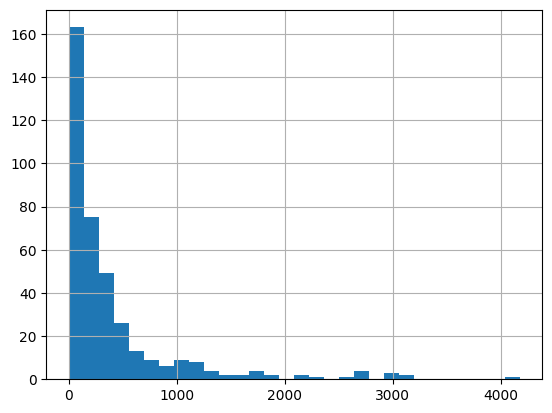

In [ ]:
station_stat_full['count'].hist(bins=30)

<AxesSubplot: >

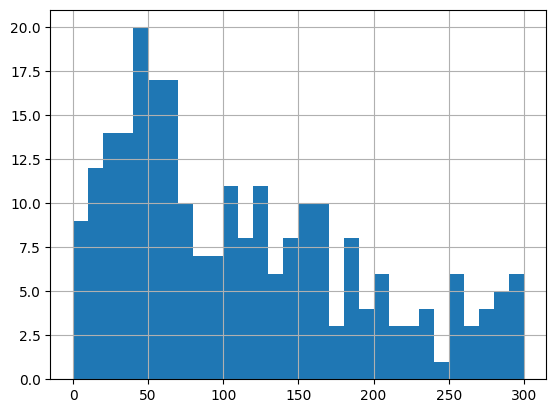

In [ ]:
station_stat_full['count'].hist(bins=30, range=(0,300))

Вывод: 

На первой гистограмме пик около 0 заездов. На второй — около 50.

Можно отбросить все подозрительно непопулярные станции, куда заезжали менее 75 раз. Явно с ними что-то не то. Однако таких станций довольно много, и как бы вам не пришлось проводить ещё одно исследование. А времени на него нет, и поручить некому! 

Установите порог в 30, и будете спокойно спать этой ночью.

Изучив построенные гистограммы, стоит исключить те АЗС, на которые в течение семи дней заезжали 30 или менее раз. Для этого нужно найти в таблице station_stat_full АЗС с числом заездов больше 30, сгруппировать их по названию сети и рассчитать медиану медианных значений. 

медианные значения в таблице station_stat_full — это медианная длительность заправок по АЗС. Чтобы получить значение по каждой сети, возьмем медиану этих медиан.

In [ ]:
good_stat2= station_stat_full.query('count >30').\
    pivot_table(index='name',values='time_spent',aggfunc=['median', 'count'])

good_stat2.columns = ['median_time', 'stations']
print(good_stat2.head())

          median_time  stations
name                           
Агератум       308.50         3
Амарант        169.00         5
Аммобиум       178.75         4
Арктотис       190.50         3
Астильба       435.50         4


In [ ]:
stat = data.pivot_table(index='name', values='time_spent')
stat['good_time_spent'] = good_stat['time_spent']
stat

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0
Бальзамин,134.508411,158.0
Бархатцы,145.300328,181.5
Бегония,163.200647,195.0
Белоцветник,100.818966,154.0


Соберем все данные по каждой сети воедино:

- среднее время заправки из сырых данных
- медианное время заправки из отфильтрованных данных
- медианное время заправки по медианному значению типичной АЗС для сети из отфильтрованных данных

In [ ]:

final_stat = stat.join(good_stat2)
final_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0
Бальзамин,134.508411,158.0,158.00,1.0
Бархатцы,145.300328,181.5,181.50,1.0
Бегония,163.200647,195.0,190.00,3.0
Белоцветник,100.818966,154.0,154.00,1.0


Среднее время заправки в сети «Роза» теперь оценивается как 350 секунд, а не 315. Ещё пропали данные по сети «Обриета» — значит, там были АЗС со слишком малым числом заездов. 

Как убедиться, что преобразованный набор данных лучше исходного? На графиках  <font color='red'>совместного распределения</font>.

### Как убедиться в том,  что избавление от аномалий не повлияло на природу распределения исходных данных?

<AxesSubplot: xlabel='count', ylabel='time_spent'>

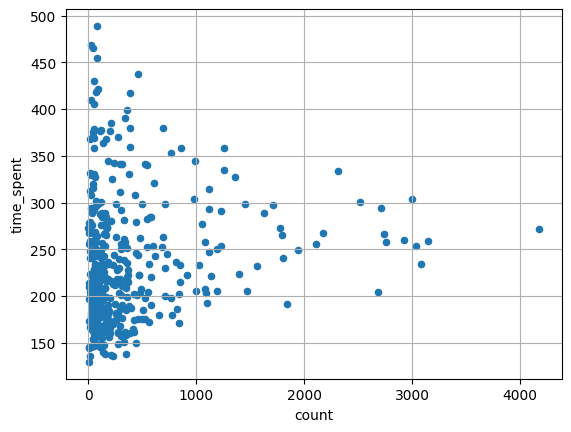

In [ ]:
# построим диаграмму рассеивания scatter-plot для сетей азс с указанием:
# - по оси Х - числа заездов
# - по оси У - меданное время нахождения на заправке

station_stat_full.plot(kind='scatter', x='count', y='time_spent', grid=True)

АЗС с малым числом заездов имеют значительный разброс медианного времени заправки (от 120 до 500). Остальные обычно укладываются в границы 200–350 секунд. Это наводит на две идеи:

- АЗС с большим числом заездов — крупные, процессы на них отлажены, вот и время одинаковое.

- Где мало заездов, там искажения данных более вероятны.

<AxesSubplot: xlabel='count', ylabel='time_spent'>

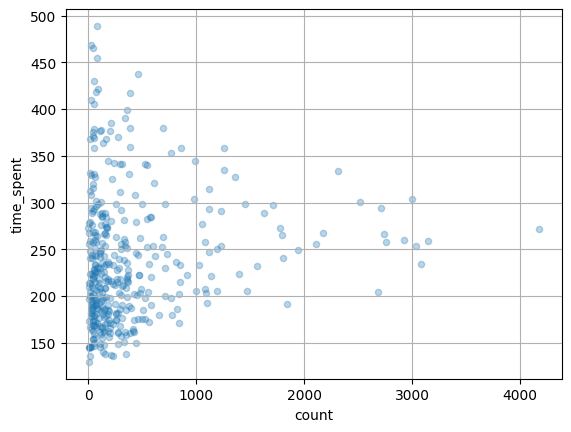

In [ ]:
# можно сделать точки на графике более прозрачными засчет аргумента alpha

station_stat_full.plot(kind='scatter', x='count', y='time_spent', grid=True, alpha=0.3)

Способ 2

Когда точек много и каждая в отдельности не интересна, данные отображают особым способом. График делят на ячейки; пересчитывают точки в каждой ячейке. Затем ячейки заливают цветом: чем больше точек — тем цвет гуще. 

Такой тип графика задают через параметр **kind**, ему присваивают значение **hexbin** (от англ. hexagonal binning plot — «график, поделённый на шестиугольные области»). 

Число ячеек по горизонтальной оси задают параметром **gridsize** (от англ. size of a grid — «размер сетки»), аналогом bins для hist(). 

Языки программирования придуманы людьми, поэтому неидеальны. Бывает, при столкновении с багами приходится ставить «костыли». Здесь это параметр **sharex=False**. Если значение True, то пропадёт подпись оси Х, а без sharex график выйдет неказистым — это «костыльный» обход бага библиотеки pandas.

<AxesSubplot: xlabel='count', ylabel='time_spent'>

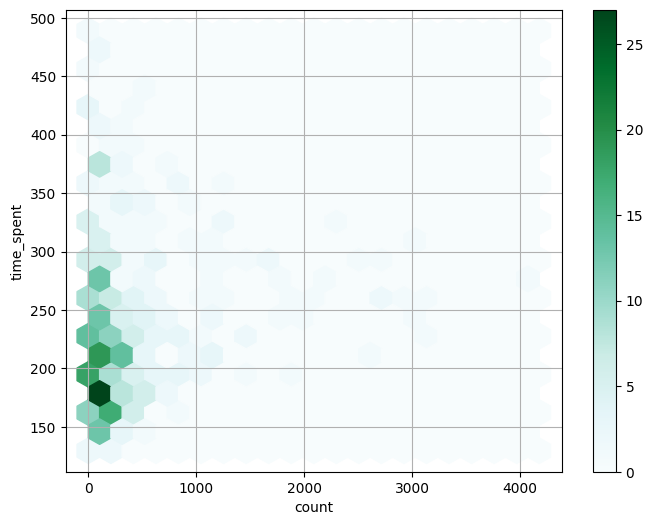

In [ ]:
station_stat_full.plot(kind='hexbin', x='count', y='time_spent', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

То, что корреляция есть, понятно. Но как оценить численно, насколько тесна взаимосвязь? 

Для этого находят <font color='green'>коэффициент корреляции Пирсона</font>. Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1. 

- Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный. 

- Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.

- Если рост одной величины связан с уменьшением другой, коэффициент отрицательный. 

In [ ]:
# получаем значение коэффициента Пирсона

station_stat_full.time_spent.corr(station_stat_full['count'])

0.12242632473597156

А если мы хотим построить зависимость нескольких величин (более двух)?

Используем <font color='green'>**Матрицу рассеивания**</font>

In [ ]:
data.head()


,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True,False
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True,False


In [ ]:
station_stat_multi= data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'], aggfunc='mean')
station_stat_multi

,time_spent,too_fast,too_slow
id,,,
00ca1b70,147.823864,0.250000,0.005682
011f7462,109.353346,0.637489,0.006416
015eaddd,103.654762,0.726190,0.011905
0178ce70,204.375000,0.211538,0.000000
018a83ef,159.612954,0.510269,0.023697
...,...,...,...
fbbd8cc2,479.413223,0.239669,0.082645
fc4b1b72,375.724377,0.191136,0.056787
fc661c22,24.199689,0.912344,0.000519


array([[<AxesSubplot: xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot: xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot: xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot: xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot: xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot: xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot: xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot: xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot: xlabel='too_slow', ylabel='too_slow'>]],
      dtype=object)

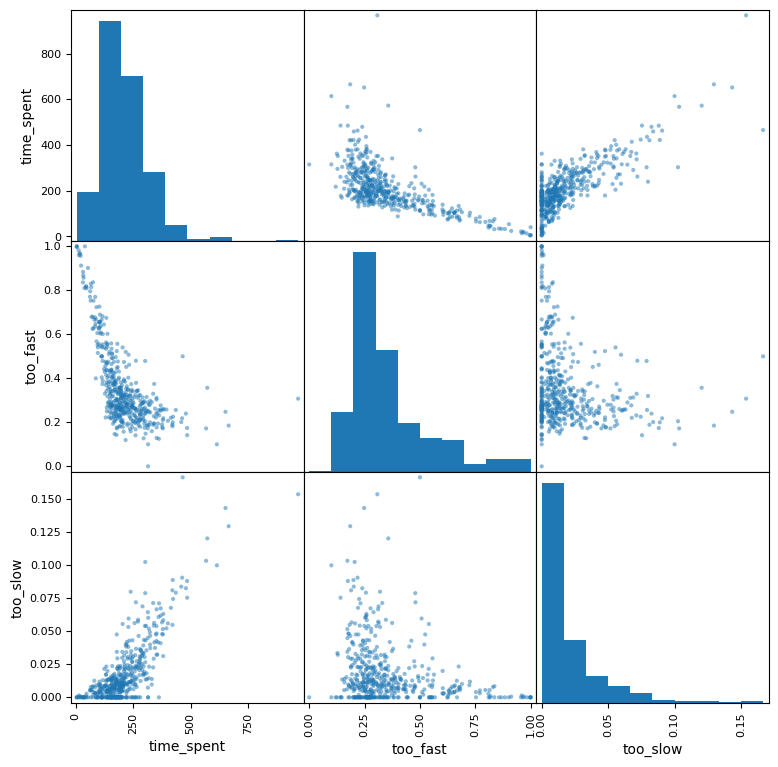

In [ ]:

pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))

In [ ]:
# матрица корреляции в цифрах

station_stat_multi.corr()


,time_spent,too_fast,too_slow
time_spent,1.000000,-0.640658,0.802247
too_fast,-0.640658,1.000000,-0.255876
too_slow,0.802247,-0.255876,1.000000


                Самый большой коэффициент корреляции — 0,8 — между аномально долгими заправками (too_slow) и средней продолжительностью заправки (time_spent). Это заметно и на соответствующей диаграмме рассеяния. Зная одно значение, можно предсказать другое. Если бы слишком долгие заезды не были отрезаны, они бы сказались на среднем времени. Поэтому так важно было их отбросить и вместо среднего значения взять медиану.

                Зависимость между аномально быстрыми заправками (too_fast) и средней продолжительностью заправки интереснее. На диаграмме рассеяния видно, что при too_fast > 0.6 (т. е. более 60% заездов на АЗС продолжались меньше минуты) среднее время заправки почти полностью определяется как раз долей этих быстрых заездов. Если бы мы их не отфильтровали, типичное время заправки напоминало бы пит-стоп на «Формуле-1». 

        Графики подтверждают, что пока все действия по фильтрации обоснованы 

In [ ]:
good_stations_stat.head()

,time_spent
id,
00ca1b70,166.0
0178ce70,234.5
01abf4e9,181.5
030a9067,135.5
03740f2d,289.0


In [ ]:
station_stat_multi.head()

,time_spent,too_fast,too_slow
id,,,
00ca1b70,147.823864,0.250000,0.005682
011f7462,109.353346,0.637489,0.006416
015eaddd,103.654762,0.726190,0.011905
0178ce70,204.375000,0.211538,0.000000
018a83ef,159.612954,0.510269,0.023697


In [ ]:
# добавим столбец с медианным значением отфитрованного времени, 
# проведенного на заправке (исключенные слишком быстрые и слишком медленные заправки)


station_stat_multi = station_stat_multi.join(good_stations_stat.rename(columns={'time_spent': 'good_time_spent'}))
station_stat_multi

,time_spent,too_fast,too_slow,good_time_spent
id,,,,
00ca1b70,147.823864,0.250000,0.005682,166.0
011f7462,109.353346,0.637489,0.006416,NaN
015eaddd,103.654762,0.726190,0.011905,NaN
0178ce70,204.375000,0.211538,0.000000,234.5
018a83ef,159.612954,0.510269,0.023697,NaN
...,...,...,...,...
fbbd8cc2,479.413223,0.239669,0.082645,454.5
fc4b1b72,375.724377,0.191136,0.056787,340.0
fc661c22,24.199689,0.912344,0.000519,NaN


In [ ]:
# построим матрицу корреляции 
station_stat_multi.corr()

,time_spent,too_fast,too_slow,good_time_spent
time_spent,1.000000,-0.640658,0.802247,0.702429
too_fast,-0.640658,1.000000,-0.255876,-0.315120
too_slow,0.802247,-0.255876,1.000000,0.445926
good_time_spent,0.702429,-0.315120,0.445926,1.000000


array([[<AxesSubplot: xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot: xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot: xlabel='too_slow', ylabel='time_spent'>,
        <AxesSubplot: xlabel='good_time_spent', ylabel='time_spent'>],
       [<AxesSubplot: xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot: xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot: xlabel='too_slow', ylabel='too_fast'>,
        <AxesSubplot: xlabel='good_time_spent', ylabel='too_fast'>],
       [<AxesSubplot: xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot: xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot: xlabel='too_slow', ylabel='too_slow'>,
        <AxesSubplot: xlabel='good_time_spent', ylabel='too_slow'>],
       [<AxesSubplot: xlabel='time_spent', ylabel='good_time_spent'>,
        <AxesSubplot: xlabel='too_fast', ylabel='good_time_spent'>,
        <AxesSubplot: xlabel='too_slow', ylabel='good_time_spent'>,
        <AxesSubplot: xl

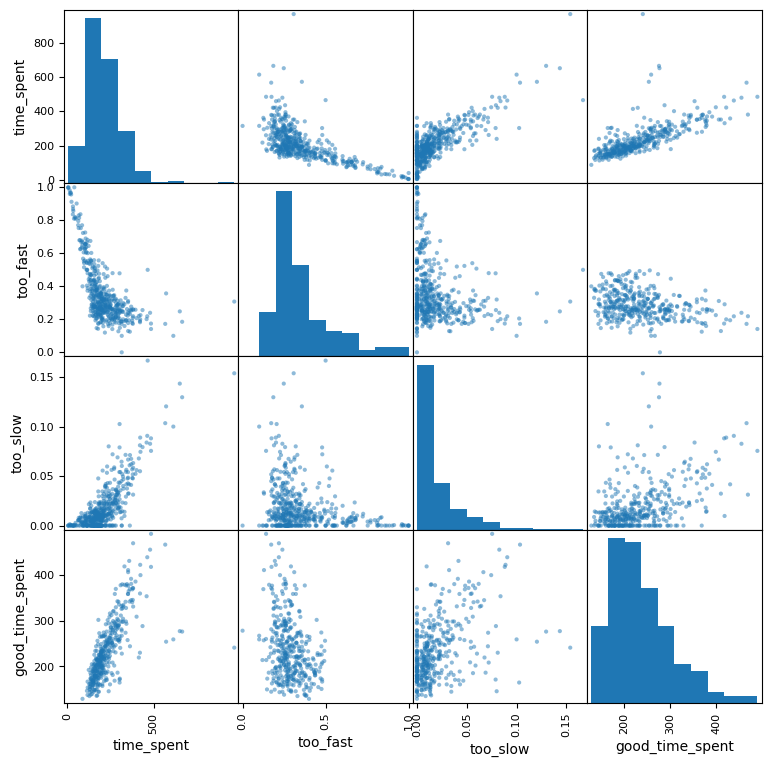

In [ ]:
# построим матрицу рассеяния 
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))

        В ячейке too_fast — time_spent видна почти прямая зависимость между too_fast и time_spent в зоне too_fast > 0.6. То есть время на АЗС там практически однозначно определяет доля быстрых заездов. 

        Зависимость медианной длительности заезда good_time_spent от аномально быстрых заездов в соответствующем поле too_fast уже значительно меньше. Данные в этой ячейке видятся наиболее очищенными от влияния слишком быстрых заездов. Зона 0.35 < too_fast < 0.5 уже спорная. И всё же данные из неё гораздо меньше загрязнены, чем данные с too_fast > 0.5. Это видно по тому, что в такой зоне нет прямой зависимости между too_fast и good_time_spent.

    Возможная проблема: 

    убрали не очень много долгих заправок. Возможно, не ошибка в данных, а на АЗС действительно не торопятся заправлять. Интересно, копуши работают во всех сетях равномерно или где-то плавность движений прописана в регламентах и поощряется премиями?

Теперь визуализируем распределение лучших показателей заездов с типичной продолжительностью по сетям АЗС.

<AxesSubplot: xlabel='name'>

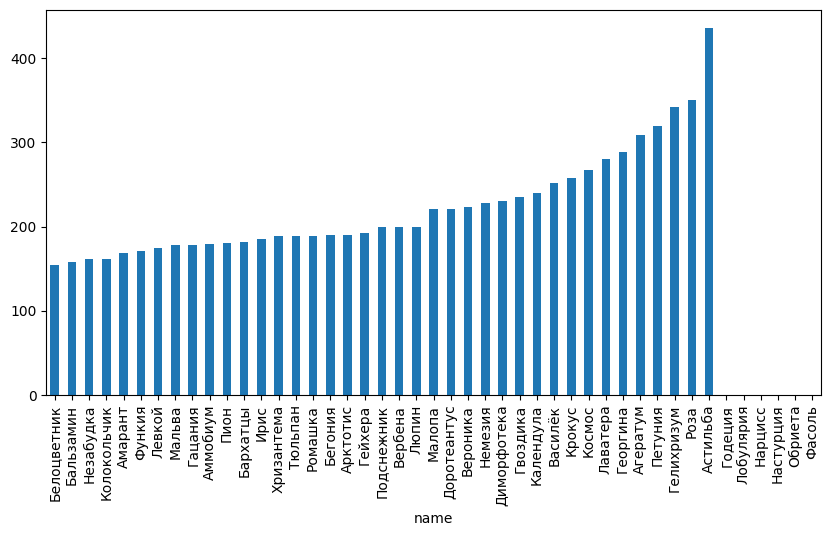

In [ ]:
final_stat.median_time.sort_values().plot(kind='bar', figsize=(10,5))

Хорошо видно, как различаются сети. Есть группа сетей, где заправляют быстрее 200 секунд. И группа более медлительных конкурентов: с диапазоном 200–350 секунд. Утешительный приз в конкурсе «скорость без границ» получает сеть «Астильба», где ухитряются заправлять дольше 400 секунд. Наверное, там есть подкачка шин, телевизор и вкусный кофе.

<AxesSubplot: xlabel='name'>

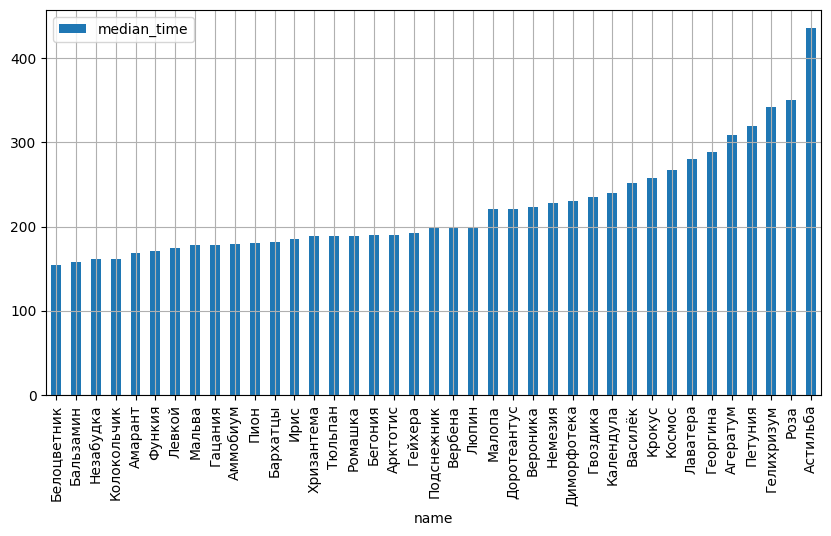

In [ ]:
# усовершенствуем диаграмму - добавим сетку, удалим пустоты

final_stat.dropna().\
    sort_values(by='median_time').\
        plot(kind='bar', figsize=(10,5), grid=True, y='median_time')

        Хорошо видна условная граница, разделяющая «быстрые» и «медленные» сети. 

        Что даёт этот факт? Клиентам «быстрых» АЗС оплата заправки через Яндекс.Навигатор вряд ли принесёт много пользы. Они и без этого и заправляются, и платят быстро. А вот клиентам АЗС, чьи процессы отлажены не так хорошо, Яндекс.Навигатор поможет проводить меньше времени на станции. А сами АЗС могли бы значительно улучшить показатели. 

        От аналитика ждут, что он укажет, кого избрать ключевым партнёром. А какая «медленная» сеть всех крупнее, всех масштабнее и виднее?

До этого момента вы фильтровали данные по количеству заездов на одну АЗС и по длительности заправки. Но стоит учесть ещё одну переменную: число АЗС внутри сетей. С точки зрения маркетинга интересны и сети с большей продолжительностью заправки, и сети, в которых много АЗС. 

Значит, <font color='red'>нужно исключить те сети, в которых заправочных станций мало</font>. А для начала посмотрите, как число заправочных станций распределяется по сетям.

<AxesSubplot: >

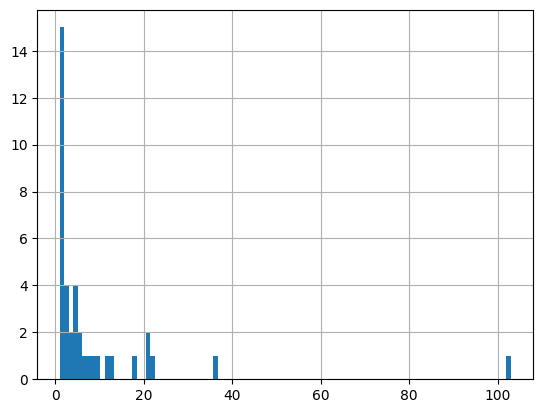

In [ ]:
final_stat.stations.hist(bins=100)

Есть такие сети АЗС, у которых меньше 10 станций, есть отдельные большие сети. 
Крупные рыбы интересуют нас в первую очередь, а мальков нужно собрать в одной группе.

In [ ]:
# соберем большие сети в отдельную переменную

big_nets_stat = final_stat.query('stations >10')
big_nets_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Василёк,268.849897,264.0,252.00,103.0
Гейхера,167.445947,204.0,192.00,12.0
Календула,207.357323,254.0,240.00,36.0
Колокольчик,119.131564,161.0,161.00,21.0
Люпин,235.440937,186.0,200.00,13.0
Мальва,136.562234,182.0,177.75,22.0
Немезия,186.535207,226.0,227.50,21.0
Роза,260.877217,315.0,350.00,18.0


Теперь можно разделить все сети на две группы: «Большая восьмёрка» и «Другие». Вторая группа будет восприниматься как одна большая сеть.

In [ ]:
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


In [ ]:
# здесь переименовавываем сети, у которых количество станций меньше 10
station_stat_full['group_name'] = station_stat_full.name.where(station_stat_full.name.isin(big_nets_stat.index), 'Другие' )

station_stat_full

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василёк,164,234.5,Василёк
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василёк,157,289.0,Василёк
...,...,...,...,...
fb6610be,Колокольчик,426,161.0,Колокольчик
fbbd8cc2,Роза,82,454.5,Роза
fc4b1b72,Василёк,543,340.0,Василёк


In [ ]:
# повторим аналогичную логику создания таблицы good_stat2, но теперь по новому имени сетей (тк добавили "Другие")

stat_grouped= (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']

stat_grouped= stat_grouped.sort_values(by='time_spent')

stat_grouped

,time_spent,count
group_name,,
Колокольчик,161.00,21
Мальва,177.75,22
Гейхера,192.00,12
Люпин,200.00,13
Другие,208.75,104
Немезия,227.50,21
Календула,240.00,36
Василёк,252.00,103
Роза,350.00,18


<AxesSubplot: ylabel='time_spent'>

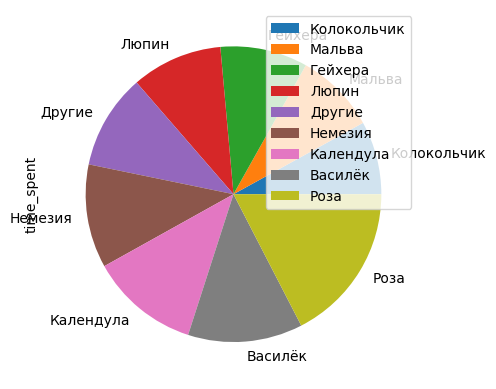

In [ ]:
# построим круговую диаграмму зависимости медианного времени проведения на сети АЗС

stat_grouped.plot(kind='pie', y='time_spent')

<AxesSubplot: ylabel='count'>

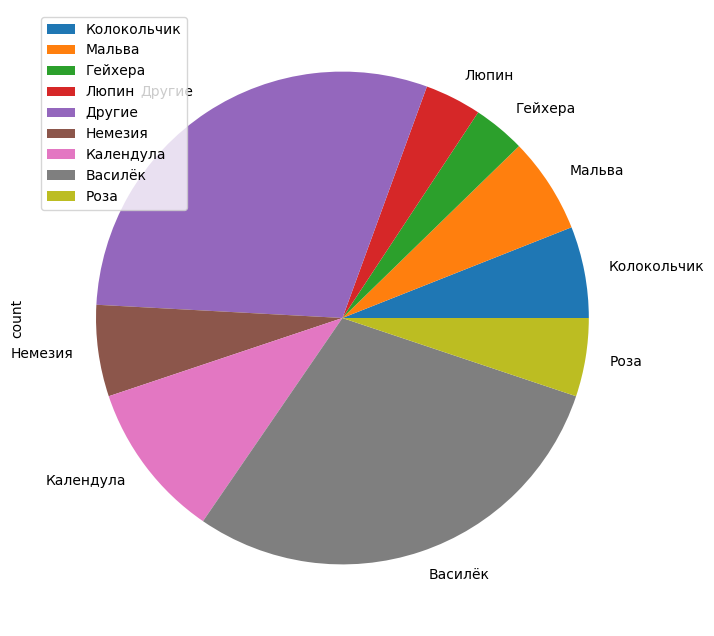

In [ ]:
# построим круговую диаграмму по числу заправок

stat_grouped.plot(kind='pie', y='count', figsize=(8,8))

Напоследок посмотрим, как продолжительность заездов распределяется по девяти сетям («Большая восьмёрка» и «Другие»). 

Загвоздка может быть вот в чём: если продолжительность сильно различается, то сравнивать показатели разных сетей будет неправильно. Например, если в одной сети больше АЗС с продолжительностью заездов по 60–70 секунд, чем в других, это может понижать медианное значение. 

Чтобы проверить, не происходит ли такое, сгруппируем данные из good_data по group_name и построим гистограммы

In [ ]:
good_data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False


In [ ]:
good_data['group_name']=good_data.name.where(good_data.name.isin(big_nets_stat.index), 'Другие')
good_data.head()

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_2350/1046418126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['group_name']=good_data.name.where(good_data.name.isin(big_nets_stat.index), 'Другие')


,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow,group_name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False,Василёк
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False,Василёк
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False,Василёк
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False,Василёк


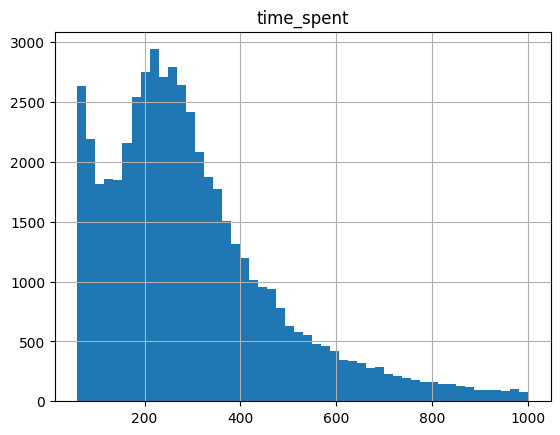

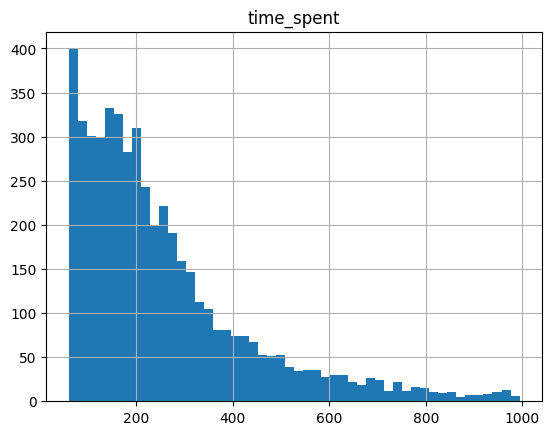

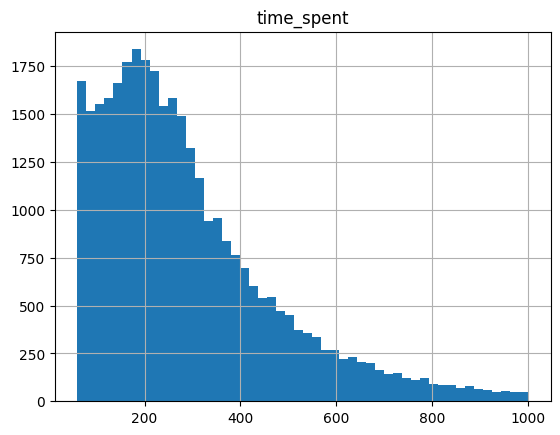

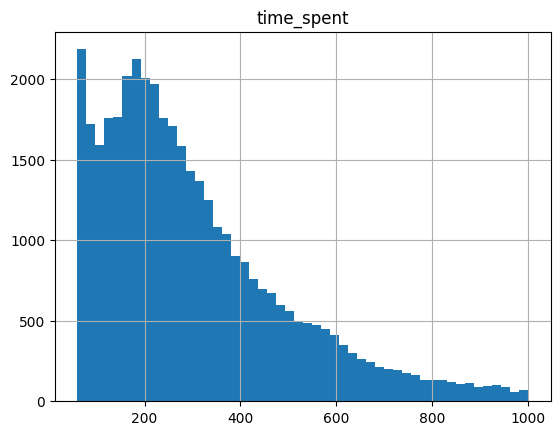

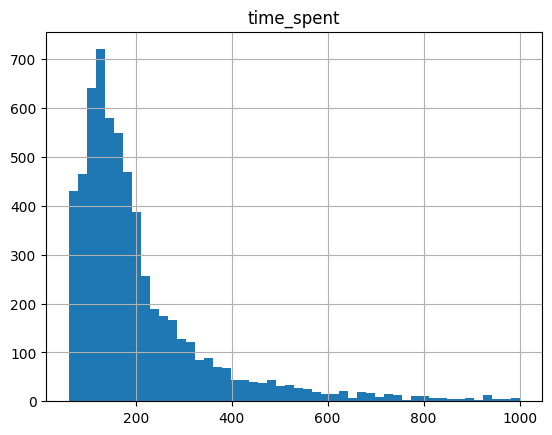

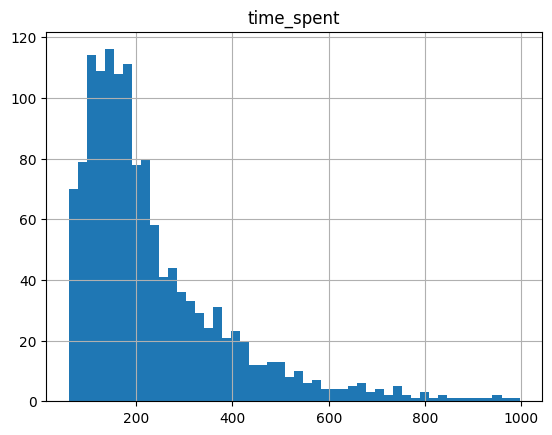

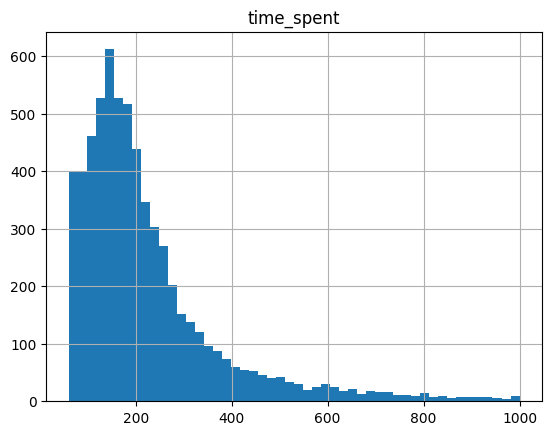

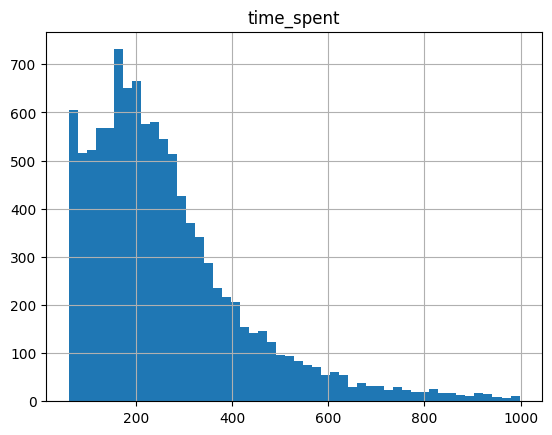

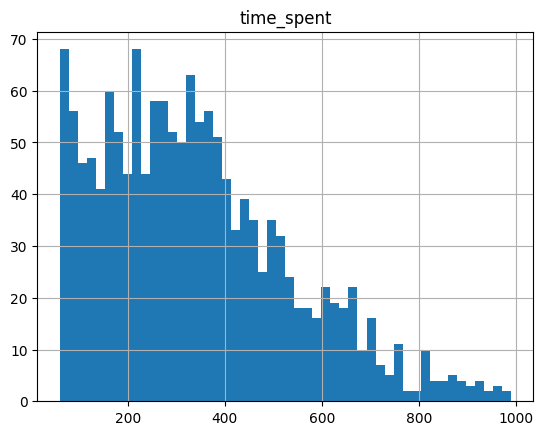

In [ ]:
# построим гистограмму для каждого имени сети АЗС , чтобы увидеть, как распределяется продолжительность заездов в каждой сети.

for name , group_data in good_data.groupby('group_name'):
    group_data.hist('time_spent', bins=50)

Это совсем ненаглядно, поэтому делаем срез по значению столбца!

In [ ]:
# column_value - значение столбца,
# column_slice - срез данных, в котором значение столбца - column_value
for column_value, column_slice in data.groupby('column'):
# do something

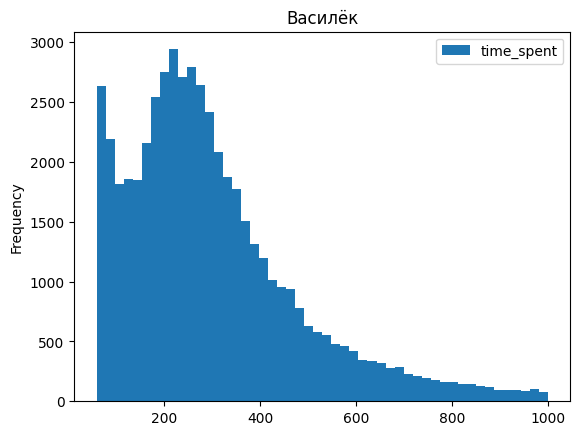

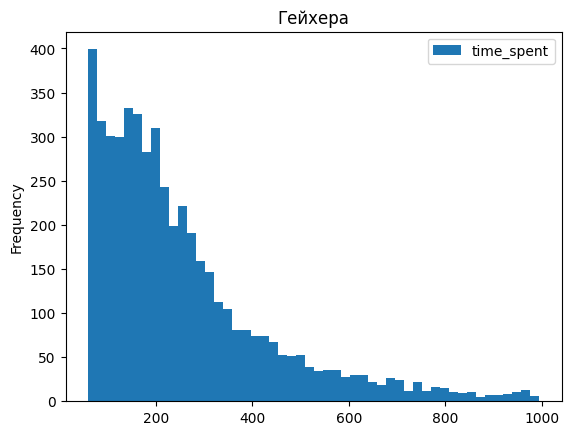

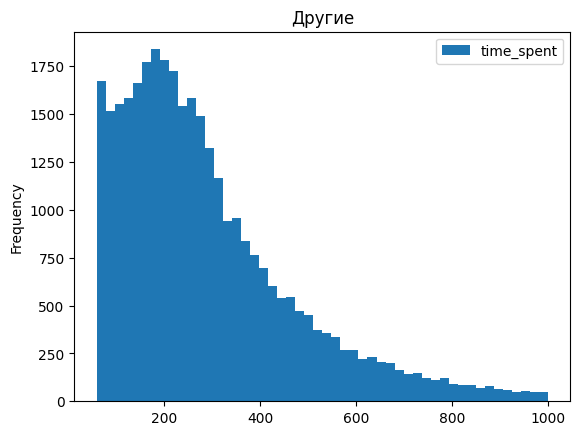

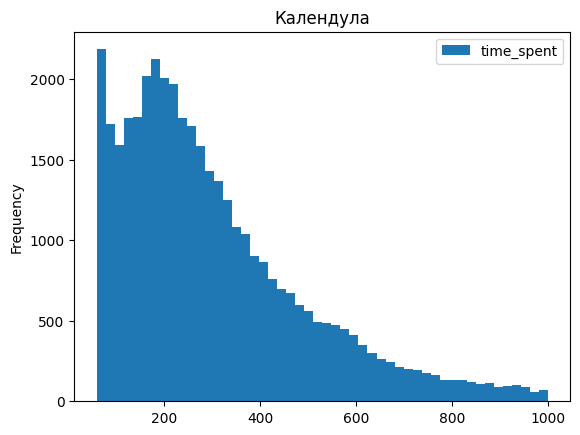

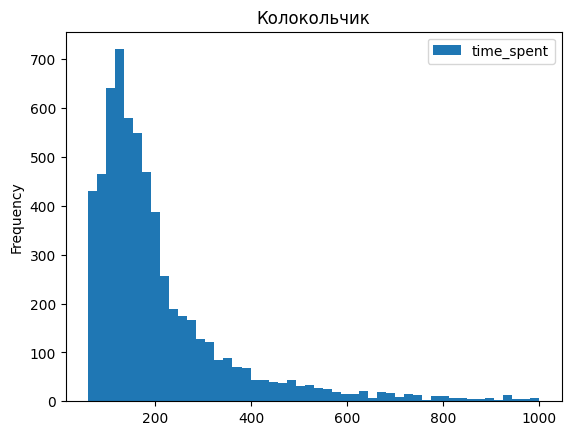

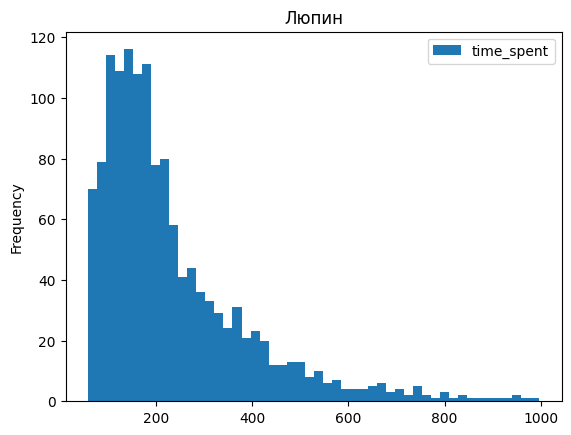

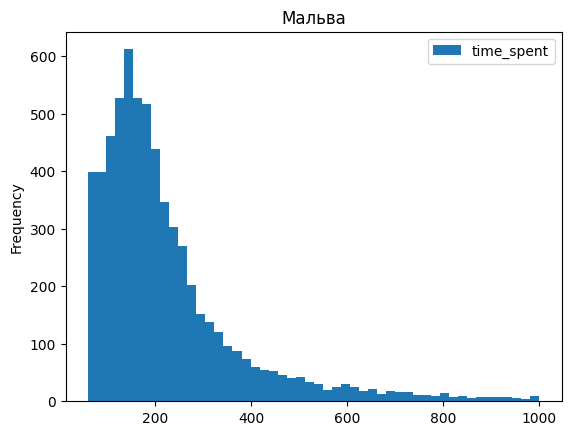

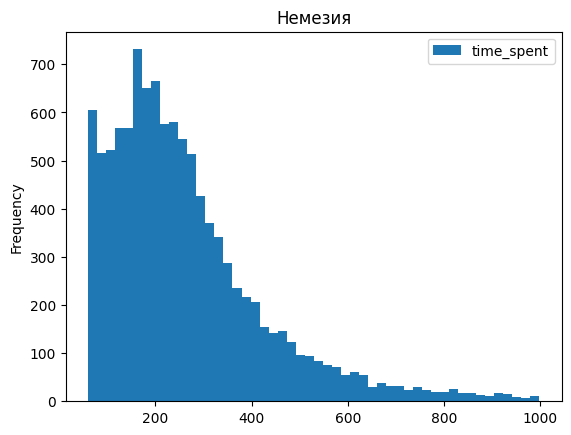

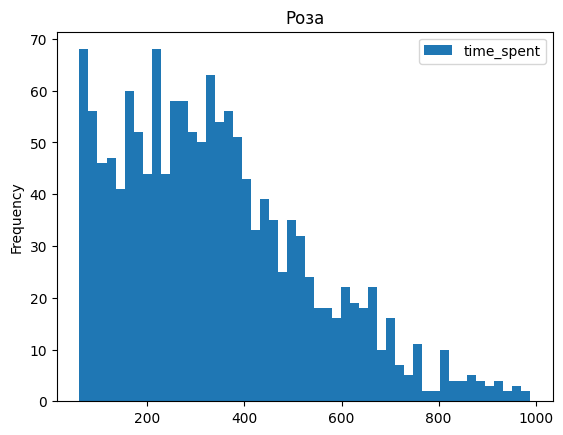

In [ ]:
# построим гистограмму для каждого имени сети с использованием plot

for name , group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', bins=50, title=name, y='time_spent')

### Продолжаем ПРОЕКТ

<font color='red'>Описание проекта</font>

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. 

In [126]:
data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/real_estate_data.csv', sep='\t')

In [127]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [128]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Дополнения 

Построить график гистограммы и boxplot на одном графике

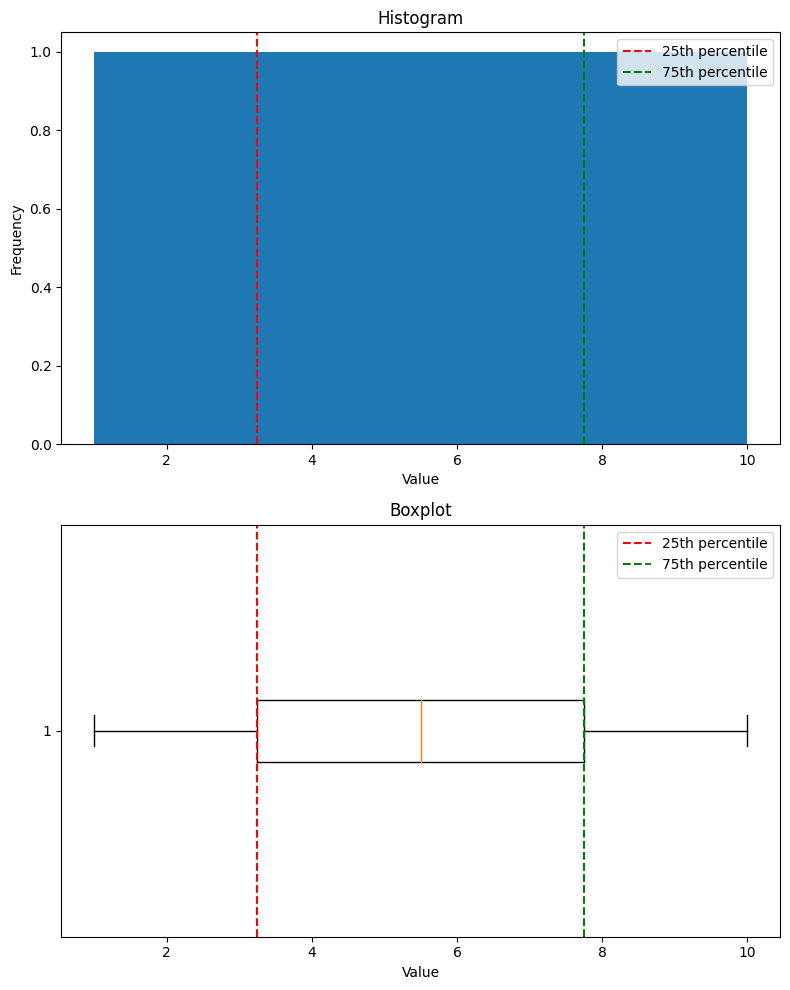

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем серию данных (замените данными из своего набора данных)
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Создаем новый график
plt.figure(figsize=(8, 10))

# Строим гистограмму
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
plt.hist(data, bins=10)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Рассчитываем квартили
q25, q75 = data.quantile(0.25), data.quantile(0.75)

# Помечаем квартили на гистограмме
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()

# Строим график boxplot
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
plt.boxplot(data, vert=False)
plt.title('Boxplot')
plt.xlabel('Value')

# Помечаем квартили на boxplot
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()


# Показываем графики
plt.tight_layout()  # Для автоматического выравнивания графиков
plt.show()
